In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as pp
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
m1 = 10
m2 = 10
freq = 2048
delta_t = 1.0 / 2048
delta_f = 1.0 / 2048

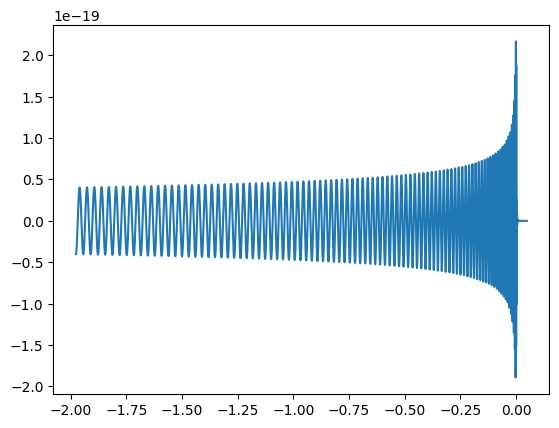

In [3]:
hp, hc = get_td_waveform(
    approximant="IMRPhenomT", mass1=m1, mass2=m2, delta_t=delta_t, f_lower=30
)

pp.plot(hp.sample_times, hp)

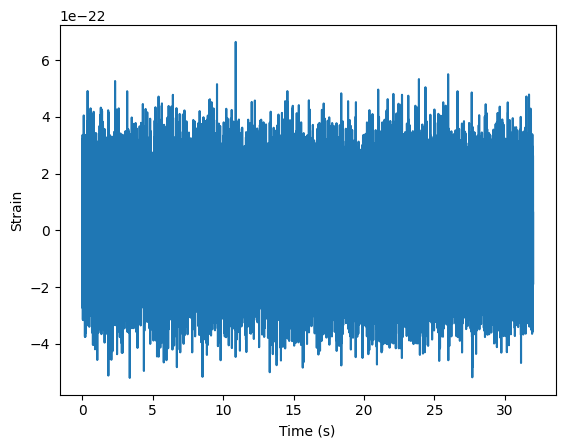

In [4]:
flow = 30.0

flen = int(freq / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 32 seconds of noise at 4096 Hz

noisesamples = int(32 / delta_t)
noise = noise_from_psd(noisesamples, delta_t, psd, seed=127)

pp.plot(noise.sample_times, noise)
pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.show()

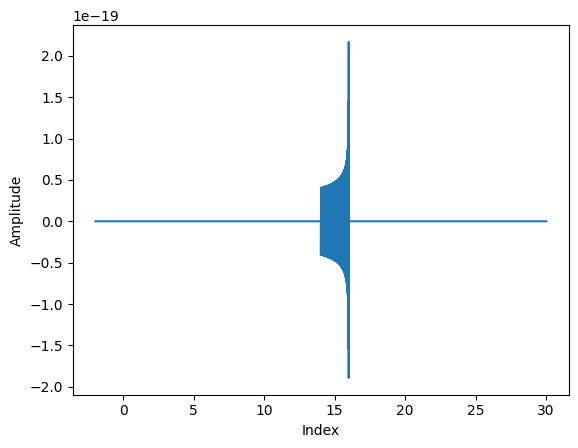

In [5]:
hp.resize(len(noise))
hc.resize(len(noise))
hp.roll(len(hp) // 2)
hp.cyclic_time_shift(hp.start_time)


pp.plot(hp.sample_times, hp)
pp.ylabel("Amplitude")
pp.xlabel("Index")
pp.show()

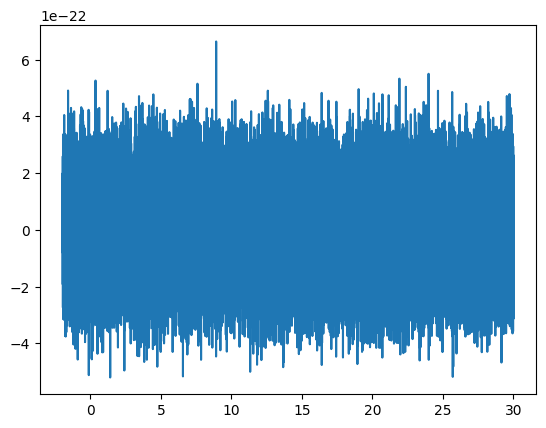

In [12]:
noise._epoch = hp._epoch
scale = 100
signal = noise + hp / 1000
pp.plot(signal.sample_times, noise)
# match = pfliter.matched_filter(hp, signal, psd=psd, low_frequency_cutoff=30.0)
# pp.plot(match.sample_times, abs(match))

In [7]:
peak = abs(match).numpy().argmax()
snrp = match[peak]
time = match.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

NameError: name 'match' is not defined